# 1. Perkenalan



=================================================

Milestone

Nama  : Muhammad Furqon Pakpahan

Batch : Hck - 009 

Dataset : Rice (Cammeo and Osmancik), https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

Objective : Meneliti dua jenis spesies beras yang bersertifikat. 

Problem Statement : Memahami dan membedakan karakteristik antara spesies beras Osmancik dan Cammeo. Untuk mencapai tujuan, data yang mencakup 3810 gambar biji beras dari kedua spesies tersebut telah diambil, diproses, dan fitur-fitur morfologi telah diekstraksi. Terdapat 7 fitur morfologi yang diambil untuk setiap butir beras.

=================================================



# 2. Import Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.io import arff


# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

print("Import Berhasil")

Import Berhasil


# 3. Data Loading

In [2]:
# load dataset
data = arff.loadarff('Rice_Cammeo_Osmancik.arff')
# Konversi data ke DataFrame pandas
df = pd.DataFrame(data[0])

df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


In [3]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('rice.csv', index=False)

In [4]:
df = pd.read_csv('rice.csv')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


| No. | Nama Kolom | Deskripsi |
|-----|----------- | --------- |
|1|Area | Mengembalikan jumlah piksel di dalam batas-batas butiran beras. |
|2|Perimeter | Menghitung keliling dengan menghitung jarak antara piksel di sekitar batas bulir beras. |
|3|Major_Axis_Length| Garis terpanjang yang dapat digambar pada butiran beras, yaitu jarak sumbu utama. |
|4|Minor_Axis_Length| aris terpendek yang dapat ditarik pada butiran beras, yaitu jarak sumbu kecil. |
|5|Eccentricity| Ini mengukur seberapa bulat elips, yang memiliki momen yang sama dengan butiran beras.  |
|6|Convex_Area| Mengembalikan jumlah piksel cangkang cembung terkecil pada wilayah yang dibentuk oleh butir beras. |
|7|Extent| Mengembalikan rasio wilayah yang dibentuk oleh butiran beras ke kotak pembatas.|
|8|Class | Cammeo and Osmancik. |

| No. | Column Name | Description |
|-----|----------- | --------- |
|1|Area | Returns the number of pixels within the boundaries of the rice grain. |
|2|Perimeter | Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain. |
|3|Major_Axis_Length| The longest line that can be drawn on a grain of rice, i.e. the principal axis distance. |
|4|Minor_Axis_Length| The shortest line that can be drawn on a grain of rice, i.e. the small axis distance. |
|5|Eccentricity| It measures how round an ellipse, which has the same moments as a grain of rice.  |
|6|Convex_Area| Returns the number of pixels of the smallest convex shell in the region formed by the rice grains. |
|7|Extent| Returns the ratio of the region formed by the rice grains to the bounding box.|
|8|Class | Cammeo and Osmancik. |

In [6]:
# Menampilkan 10 baris pertama dari sebuah DataFrame
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
5,13479.0,477.015991,200.053055,86.650291,0.901328,13786.0,0.657897,b'Cammeo'
6,15757.0,509.281006,207.296677,98.336136,0.880323,16150.0,0.589708,b'Cammeo'
7,16405.0,526.570007,221.612518,95.436707,0.902521,16837.0,0.658888,b'Cammeo'
8,14534.0,483.640991,196.650818,95.050682,0.875429,14932.0,0.649651,b'Cammeo'
9,13485.0,471.570007,198.272644,87.727287,0.896789,13734.0,0.572320,b'Cammeo'


In [7]:
# Menampilkan 10 baris terakhir dari sebuah DataFrame 
df.tail(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3800,11611.0,431.273010,178.513947,84.112518,0.882036,11775.0,0.691913,b'Osmancik'
3801,10604.0,409.510986,172.302704,78.918831,0.888940,10755.0,0.586180,b'Osmancik'
3802,12349.0,434.138000,180.241928,88.264580,0.871891,12526.0,0.627490,b'Osmancik'
3803,11538.0,418.661011,170.850906,86.498398,0.862369,11741.0,0.713544,b'Osmancik'
3804,12501.0,451.799011,192.738800,83.195061,0.902043,12687.0,0.718820,b'Osmancik'
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,b'Osmancik'


In [8]:
# Mengakses informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [9]:
# Mengecek data duplicate 
df.duplicated().sum()

0

- tidak terdapat duplicate data dalam dataset ini.

In [10]:
# Mengecek nama-nama kolom dalam DataFrame
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [11]:
#  Menghasilkan statistik deskriptif dari DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050


- menghitung nilai dari setiap kolom baik nilai rata-rata, std, minimal, 25,50, 75% serta nilai maksimal.

In [12]:
# Duplicate Data
dataduplicate = df.copy()

print("Berhasil Duplicate Data")

Berhasil Duplicate Data


# 4. Exploratory Data Analysis ( EDA )

1. Penyebaran jenis beras spesies Osmancik dan spesies Cammeo.

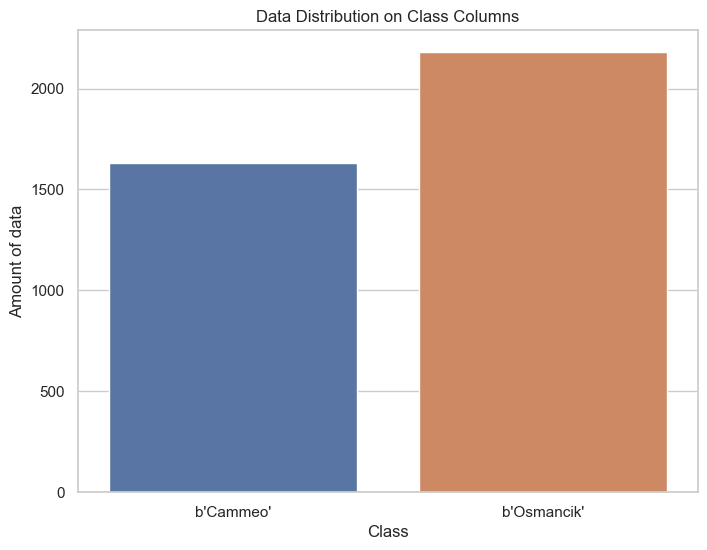

In [8]:
# Visualisasi penyebaran data pada kolom 'Class' dengan diagram batang
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='Class', data=df)
plt.title('Data Distribution on Class Columns')
plt.xlabel('Class')
plt.ylabel('Amount of data')

plt.show()


- lebih banyak jumlah data pada b'Osmancik' daripada b'Cammeo'.
- perbedaan dari kedua jenis spesies ini tidak jauh beda.

2. Distribusi spesies beras dengan jumlah piksel di dalam batas-batas butiran beras.

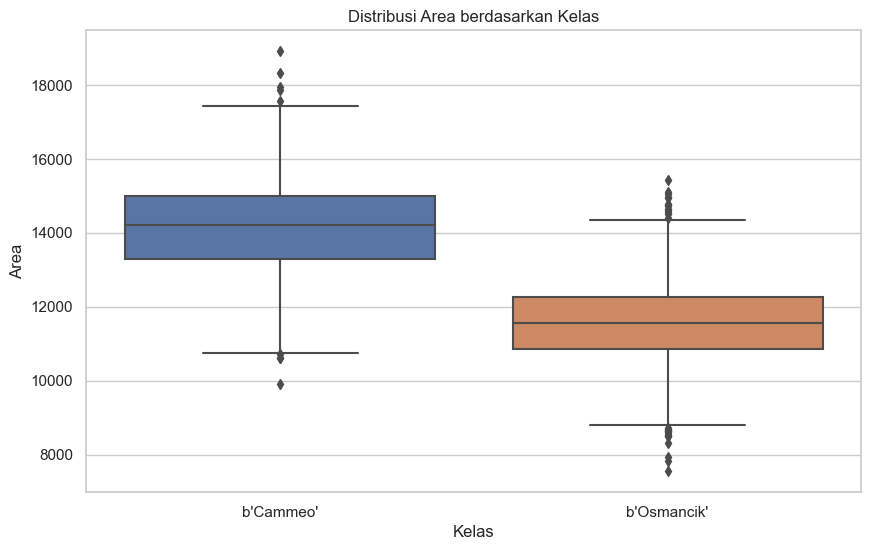

In [14]:
# Membuat boxplot untuk kolom 'Area' dengan kolom 'Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Area', data=df)
plt.title('Distribusi Area berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Area')
plt.show()


In [15]:
# Mengelompokkan data berdasarkan kolom 'Class'
grouped_data = df.groupby('Class')

# Menghitung mediana, Q1, Q3, dan IQR untuk setiap kelas
class_stats = grouped_data['Area'].describe()[['50%', '25%', '75%']]
class_stats['IQR'] = class_stats['75%'] - class_stats['25%']

# Menampilkan hasil perhitungan
print(class_stats)


                 50%       25%      75%      IQR
Class                                           
b'Cammeo'    14212.0  13289.25  14997.0  1707.75
b'Osmancik'  11552.5  10850.50  12269.0  1418.50


- terdapat distribusi jumlah piksel baik itu garis tengah, garis bawah, garis atas pada spesies commeo lebih besar daripada osmancik.

3. Persebaran batas butiran beras dengan jarak kelilingnya.

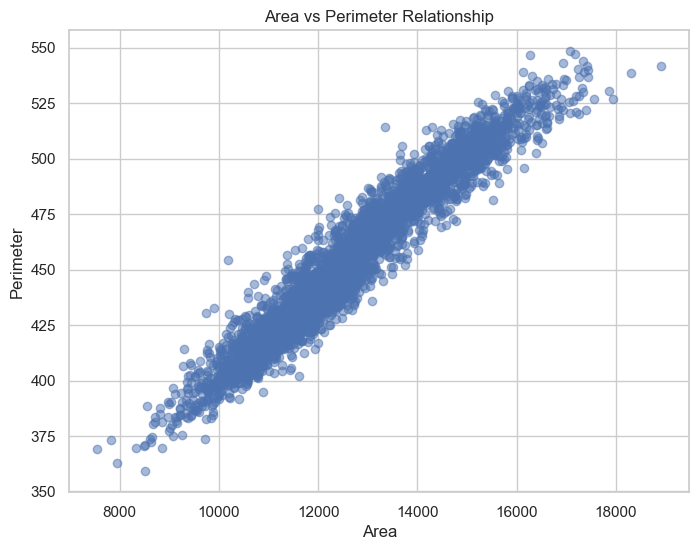

In [9]:
# Membuat scatter plot Area vs Perimeter
plt.figure(figsize=(8, 6))
plt.scatter(df['Area'], df['Perimeter'], alpha=0.5)
plt.title('Area vs Perimeter Relationship')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.grid(True)
plt.show()

- pola yang cenderung diagonal menunjukkan korelasi positif antara kedua variabel tersebut.
- artinya jumlah piksel pada beras semakin besar sesuai dengan jarak keliling nya.

4. Mengukur seberapa bulat elips yang memiliki momen yang sama dengan butir beras. 

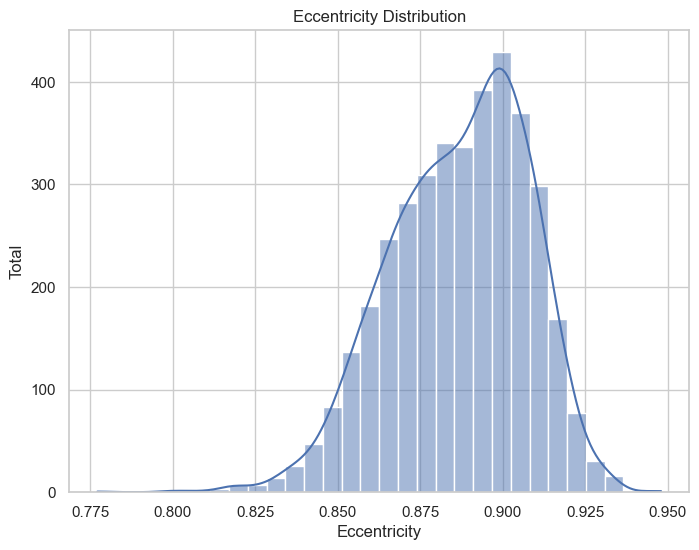

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Eccentricity'], bins=30, kde=True)
plt.title('Eccentricity Distribution')
plt.xlabel('Eccentricity')
plt.ylabel('Total')
plt.show()


5. Garis terpanjang yang dapat digambar pada spesies beras.

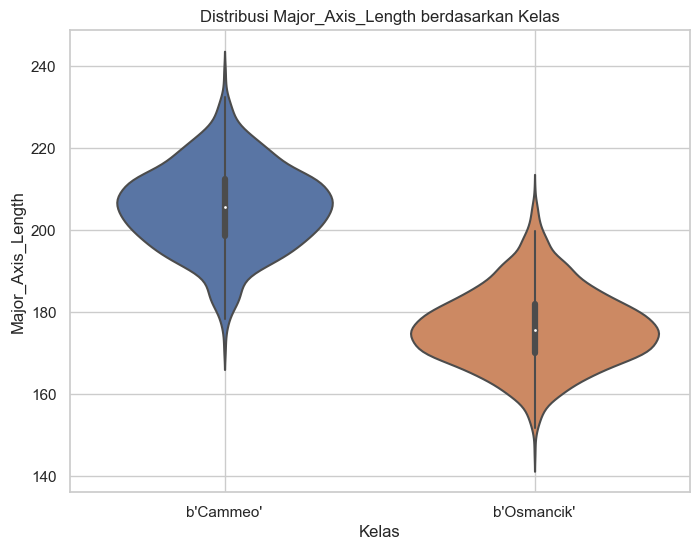

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Major_Axis_Length', data=df)
plt.title('Distribusi Major_Axis_Length berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Major_Axis_Length')
plt.grid(True)
plt.show()


# 5. Feature Engineering

Handling Missing Value

In [19]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

- tidak terdapat missing value.

Split Between X (features) and y (target)

In [20]:
# splitting between X dan y
X = df.drop(['Class'], axis= 1)
y = df['Class']
X.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024
5,13479.0,477.015991,200.053055,86.650291,0.901328,13786.0,0.657897
6,15757.0,509.281006,207.296677,98.336136,0.880323,16150.0,0.589708
7,16405.0,526.570007,221.612518,95.436707,0.902521,16837.0,0.658888
8,14534.0,483.640991,196.650818,95.050682,0.875429,14932.0,0.649651
9,13485.0,471.570007,198.272644,87.727287,0.896789,13734.0,0.572320


Split between Train-set and Test-set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)
#80:20
#70:30
print('X-train', X_train.shape)
print('X-Test', X_test.shape)
print('y-train', y_train.shape)
print('y-Test', y_test.shape)

X-train (3048, 7)
X-Test (762, 7)
y-train (3048,)
y-Test (762,)


Handling Outlier

In [22]:
normal_cols = []  # untuk menampung kolom yang masuk dalam skewness normal
skewed_cols = []  # untuk menampung kolom yang masuk dalam skewness skewed

for column in X_train:  # untuk mencari kolom mana yang skewed atau normal
    skewness = X_train[column].skew()
    if skewness < -0.5 or skewness > 0.5:  # syarat
        skewed_cols.append(column)  # masuk ke variabel penampung skewed
    elif skewness >= -0.5 or skewness <= 0.5:  # syarat
        normal_cols.append(column)  # masuk ke variabel penampung normal

print("Skewed columns:", skewed_cols)
print("Normal columns:", normal_cols)

Skewed columns: []
Normal columns: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']


Data Train

Before - After Capping


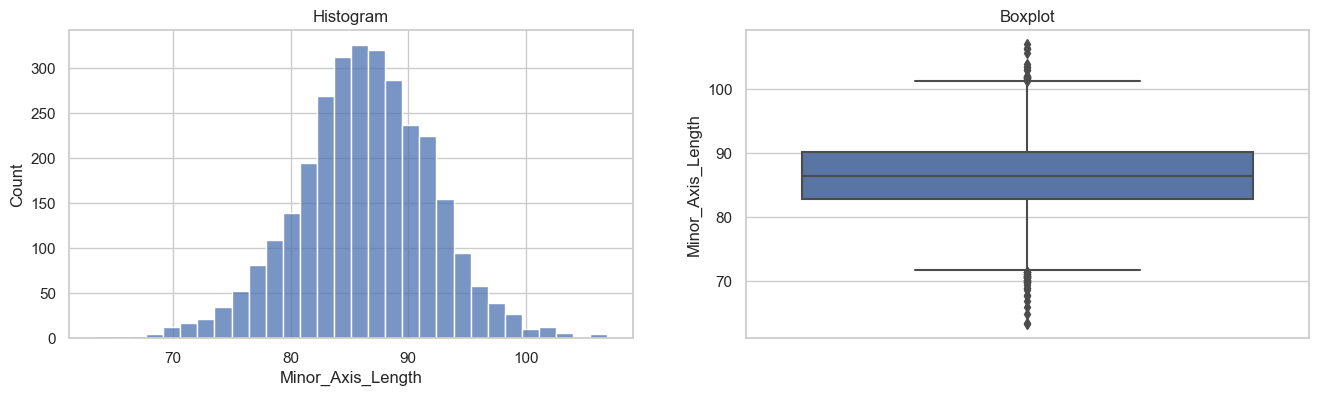

In [23]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping 
def capping_plot(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df['Minor_Axis_Length'], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Minor_Axis_Length'])
    plt.title('Boxplot')

    plt.show()

# Melihat histogram dan boxplot yang sudah di capping
print('Data Train')
print('\nBefore - After Capping')
capping_plot(X_train, 'Minor_Axis_Length')

Data Train

Before - After Capping


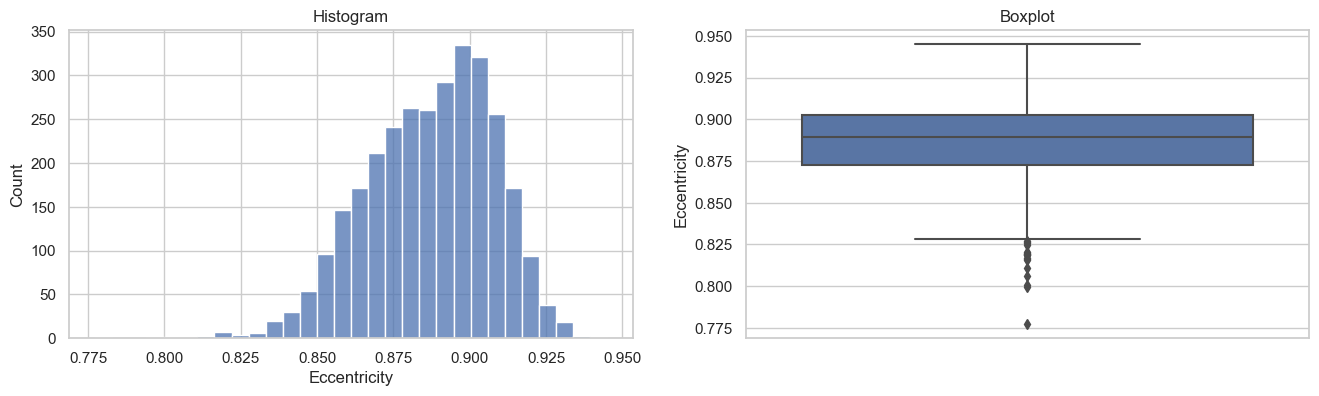

In [24]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping 
def capping_plot(df, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df['Eccentricity'], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Eccentricity'])
    plt.title('Boxplot')

    plt.show()

# Melihat histogram dan boxplot yang sudah di capping
print('Data Train')
print('\nBefore - After Capping')
capping_plot(X_train, 'Eccentricity')

In [25]:
winsoriser = Winsorizer(capping_method='iqr', # gaussian itu distribusi normal
                             tail='both', #capping 2 sisi outlier
                             fold=1.5, # rumus gaussian
                             variables=['Minor_Axis_Length', 'Eccentricity'])

winsoriser.fit(X_train)

X_train = winsoriser.fit_transform(X_train)
X_test = winsoriser.transform(X_test)
winsoriser.right_tail_caps_

{'Minor_Axis_Length': 101.23847198486328, 'Eccentricity': 0.9475358128547668}

In [26]:
X_train

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
3624,10525.0,409.731995,170.315155,79.037621,0.885800,10682.0,0.606768
3163,11501.0,428.502991,180.488785,81.408310,0.892502,11676.0,0.676529
3309,11907.0,448.061005,188.302399,82.261765,0.899530,12156.0,0.761317
3133,11840.0,432.384003,175.836884,86.647781,0.870158,12032.0,0.625760
235,16226.0,517.684021,217.080566,95.938377,0.897041,16466.0,0.583145
...,...,...,...,...,...,...,...
2490,12871.0,448.582001,183.874542,90.276299,0.871178,13102.0,0.733725
3444,12799.0,443.416992,175.329697,94.259453,0.843192,13066.0,0.631613
1576,15676.0,509.223999,212.907745,94.761665,0.895489,16009.0,0.574633
2885,10499.0,408.729004,165.559372,82.358246,0.867490,10785.0,0.661313


In [27]:
# melihat jumlah outlier pada setiap kolom
threshold = 3
outlier_counts = {}

for col in X_train.columns:
    data_skew = X_train[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))

    outlier_counts[col] = len(outliers[0])

for col, count in outlier_counts.items():
    print(f"Jumlah outlier dalam kolom {col}: {count} outlier")

Jumlah outlier dalam kolom Area: 2 outlier
Jumlah outlier dalam kolom Perimeter: 0 outlier
Jumlah outlier dalam kolom Major_Axis_Length: 0 outlier
Jumlah outlier dalam kolom Minor_Axis_Length: 0 outlier
Jumlah outlier dalam kolom Eccentricity: 0 outlier
Jumlah outlier dalam kolom Convex_Area: 2 outlier
Jumlah outlier dalam kolom Extent: 0 outlier


In [28]:
# Melihat presentase outlier pada column X_train_num
# Menetapkan batas untuk mengidentifikasi Outlier
threshold = 3

# Menginisialkan untuk menyimpan percentages outlier untuk setiap column numerik
outlier_percentages = {}

# Lakukan perulangan melalui setiap column dalam X_train
for col in X_train.columns:
    data_skew = X_train[col]
    mean = np.mean(data_skew)
    std_dev = np.std(data_skew)

    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev

    # Mengidentifikasikan Outlier berdasarkan ambang batas
    outliers = np.where((data_skew > upper_bound) | (data_skew < lower_bound))

# Menghitung persentase outliers
    total_data_points = len(data_skew)
    percentage = (len(outliers[0]) / total_data_points) * 100

# Menyimpan persentase Outlier dalam dictionary
    outlier_percentages[col] = percentage

# Print percentage Outlier untuk setiap column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column {col}: {percentage:.2f}%")

Percentage of outliers in column Area: 0.07%
Percentage of outliers in column Perimeter: 0.00%
Percentage of outliers in column Major_Axis_Length: 0.00%
Percentage of outliers in column Minor_Axis_Length: 0.00%
Percentage of outliers in column Eccentricity: 0.00%
Percentage of outliers in column Convex_Area: 0.07%
Percentage of outliers in column Extent: 0.00%


In [29]:
# Menghitung niai skewness
for i in X_train:
    skew = X_train[i].skew()
    print('Skewness dari', i, 'adalah', skew)

Skewness dari Area adalah 0.31739099646021457
Skewness dari Perimeter adalah 0.2202071450636131
Skewness dari Major_Axis_Length adalah 0.25992111080619956
Skewness dari Minor_Axis_Length adalah -0.1034670595239878
Skewness dari Eccentricity adalah -0.3657690480914791
Skewness dari Convex_Area adalah 0.3124321598394461
Skewness dari Extent adalah 0.32851837408150636


Cardinality Analysis

In [30]:
# Menghitung jumlah nilai unik dalam kolom
jumlah_nilai_area = df['Area'].nunique()
jumlah_nilai_perimeter = df['Perimeter'].nunique()
jumlah_nilai_mal = df['Major_Axis_Length'].nunique()
jumlah_nilai_minal = df['Minor_Axis_Length'].nunique()
jumlah_nilai_e = df['Eccentricity'].nunique()
jumlah_nilai_ca = df['Convex_Area'].nunique()
jumlah_nilai_ex = df['Extent'].nunique()
jumlah_nilai_c = df['Class'].nunique()

print(f"Jumlah Nilai Unik dalam Kolom 'Area': {jumlah_nilai_area}")
print(f"Jumlah Nilai Unik dalam Kolom 'Perimeter': {jumlah_nilai_perimeter}")
print(f"Jumlah Nilai Unik dalam Kolom 'Major Axis Length': {jumlah_nilai_mal}")
print(f"Jumlah Nilai Unik dalam Kolom 'Minor Axis Length': {jumlah_nilai_minal}")
print(f"Jumlah Nilai Unik dalam Kolom 'Eccentricity': {jumlah_nilai_e}")
print(f"Jumlah Nilai Unik dalam Kolom 'Convex_Area': {jumlah_nilai_ca}")
print(f"Jumlah Nilai Unik dalam Kolom 'Extent': {jumlah_nilai_ex}")
print(f"Jumlah Nilai Unik dalam Kolom 'Class': {jumlah_nilai_c}")

Jumlah Nilai Unik dalam Kolom 'Area': 2828
Jumlah Nilai Unik dalam Kolom 'Perimeter': 3738
Jumlah Nilai Unik dalam Kolom 'Major Axis Length': 3808
Jumlah Nilai Unik dalam Kolom 'Minor Axis Length': 3804
Jumlah Nilai Unik dalam Kolom 'Eccentricity': 3803
Jumlah Nilai Unik dalam Kolom 'Convex_Area': 2857
Jumlah Nilai Unik dalam Kolom 'Extent': 3804
Jumlah Nilai Unik dalam Kolom 'Class': 2


- dari jumlah nilai unik tertinggi adalah Major Axis Length dengan 3808 kategori.

Check Vif

In [31]:
X = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']]

# Menghitung VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Variable           VIF
0               Area  58312.657656
1          Perimeter  37536.317405
2  Major_Axis_Length  42264.657081
3  Minor_Axis_Length   9837.102970
4       Eccentricity  12226.340868
5        Convex_Area  56306.041123
6             Extent     84.759413


- pada variabel Extent memiliki vif yang relatif rendah.
- pada variabel prediktor yang tertinggi yaitu variabel area.

Feature Selection

In [32]:
categorical = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 
                  'Eccentricity', 'Convex_Area', 'Extent']]

<Axes: >

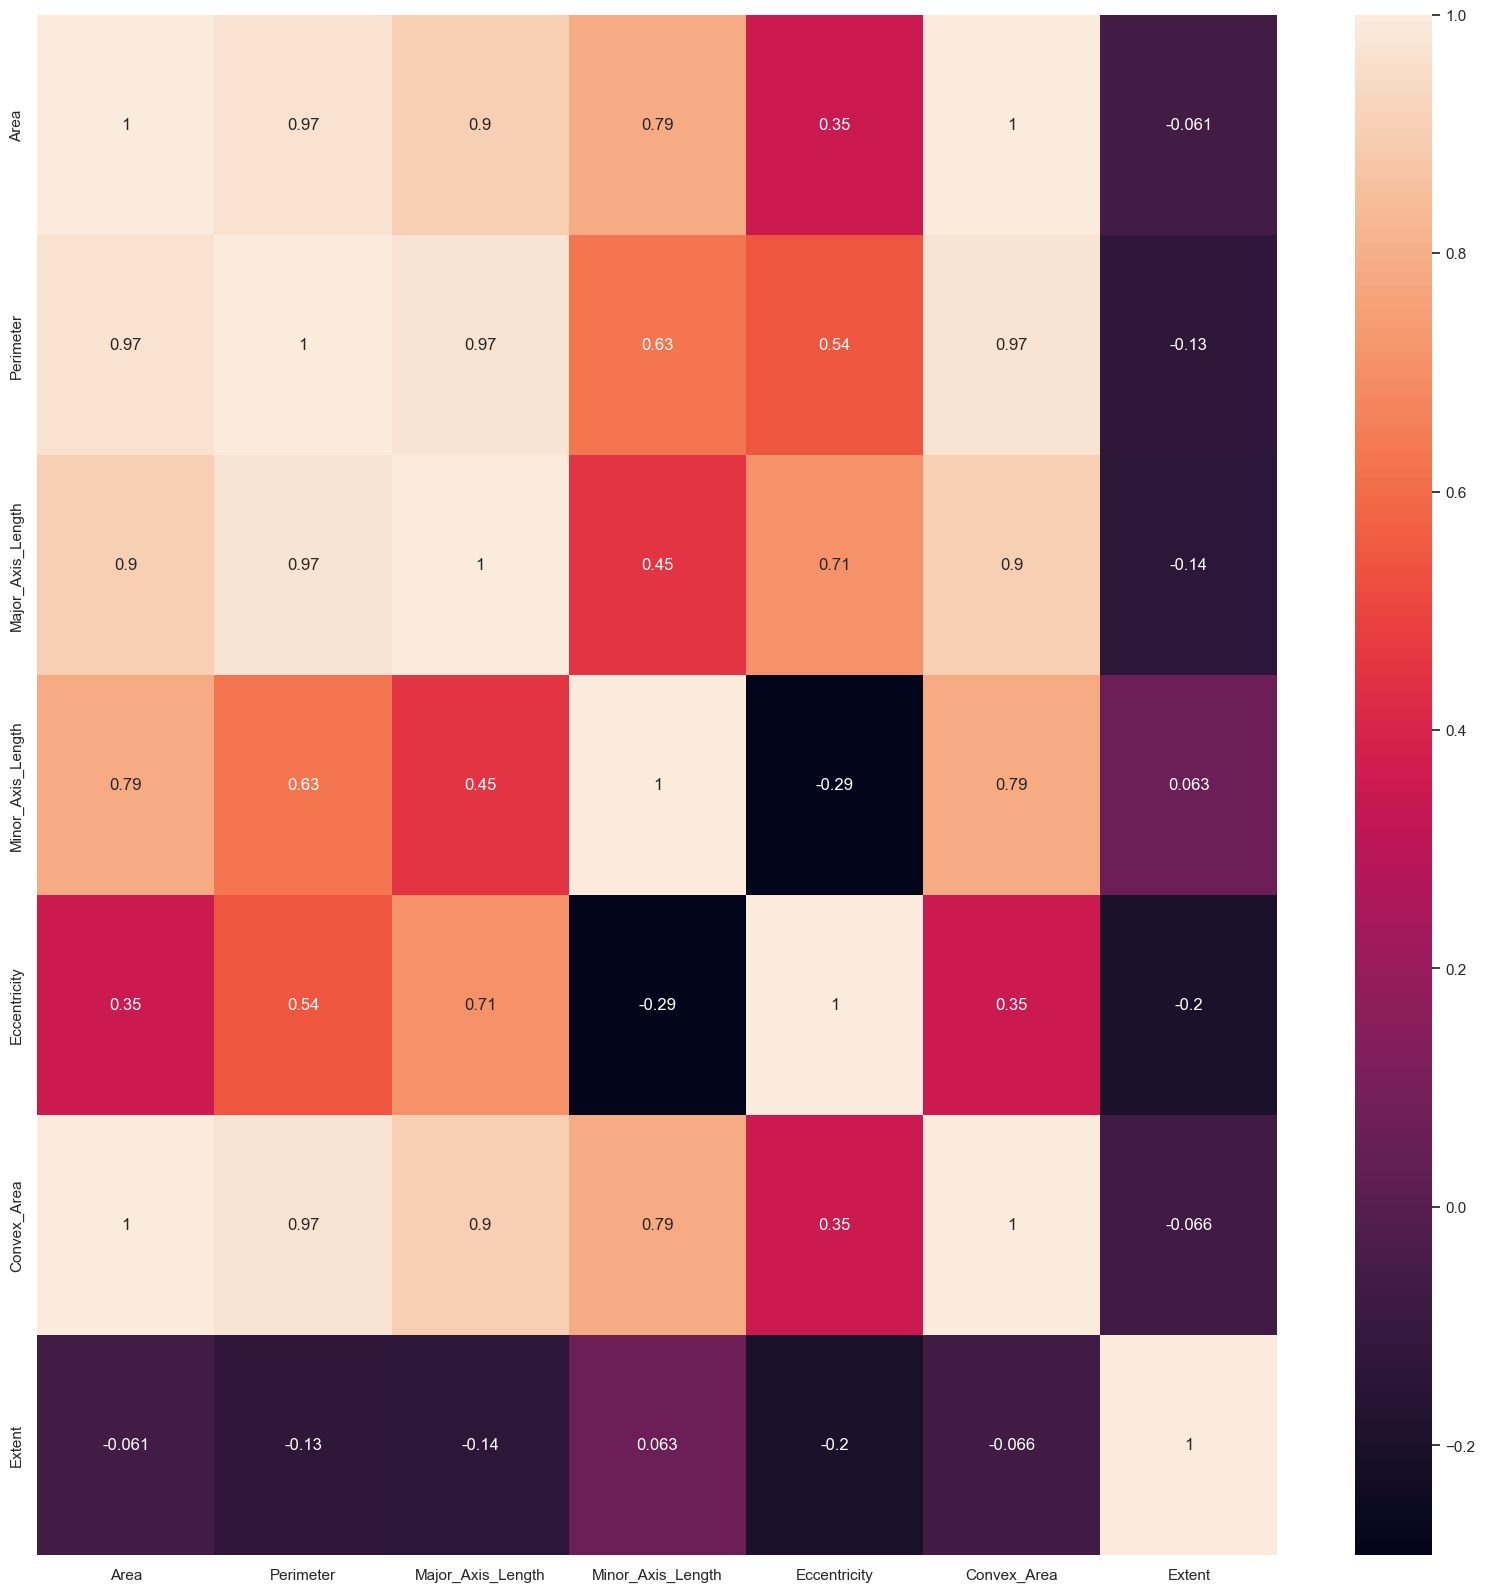

In [33]:
plt.figure(figsize=(20,20)) 
sns.heatmap(categorical.corr(method='pearson'),annot=True)

Warna Terang :
- Area dan Contex area memiliki warna terang karena semakin besar area semakin besar kemungkinan area cembungnya.
- Pada Major Axis Length dan Minor Axis Length ini menunjukkan bahwa biji yang lebih panjang dalam satu arah cenderung lebih panjang dalam arah yang lain.
- Eccentricity dan Extent. Bijih dengan eksentrisitas yang tinggi cenderung memiliki ekstent yang rendah, dan sebaliknya.

Warna Gelap : 
- Tidak ada korelasi negatif yang kuat antara variabel-variabel yang ditampilkan dalam heatmap. Semua korelasi negatif terlihat lemah atau dekat dengan nol.

Warna Netral : 
- Sebagian besar pasangan variabel tidak menunjukkan korelasi yang kuat (warna netral pada heatmap). Ini berarti bahwa variabel-variabel ini relatif independen satu sama lain.

Feature Scaling

In [34]:
columns_to_scale = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']
# column_ordin = ['FCVC','NCP','CAEC', 'CH2O', 'FAF', 'TUE' ,'CALC']
# column_onhot = ['Gender','FAVC', 'family_history_with_overweight', 'SMOKE', 'SCC', 'MTRANS']
# Create a list of transformers for the ColumnTransformer
transformers = [
    ("robust_scaler", RobustScaler(), columns_to_scale),

]

preprocessor = ColumnTransformer(transformers, remainder="passthrough")

Feature Encoding

- Semua data sudah berbentuk angka

Concate Data

- tidak perlu dilakukan karna data tidak perlu dipisahkan numerik dan kategori.

Balancing data

In [54]:
y_train.value_counts(normalize=True)

Class
b'Osmancik'    0.57021
b'Cammeo'      0.42979
Name: proportion, dtype: float64

- karna data balance jadi tidak perlu melakukan balancing data.

# 6. Model Definition

Model Pipeline

In [36]:
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))
svm_pipeline = make_pipeline(preprocessor, SVC())
decision_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))
random_forest_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
adaboost_pipeline = make_pipeline(preprocessor, AdaBoostClassifier(random_state=42))

In [37]:
classifiers = [
    ("K-Nearest Neighbors", knn_pipeline),
    ("Support Vector Classifier", svm_pipeline),
    ("Decision Tree", decision_pipeline),
    ("Random Forest", random_forest_pipeline),
    ("AdaBoost", adaboost_pipeline)
]

for name, pipeline in classifiers:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print("="*50)


K-Nearest Neighbors:
Cross-Validation Scores: [0.91803279 0.91639344 0.91639344 0.91133005 0.91954023]
Mean Accuracy: 0.9163379902554578
Support Vector Classifier:
Cross-Validation Scores: [0.91967213 0.92295082 0.92622951 0.9228243  0.92610837]
Mean Accuracy: 0.9235570271070553
Decision Tree:
Cross-Validation Scores: [0.88196721 0.89508197 0.88196721 0.8817734  0.87356322]
Mean Accuracy: 0.8828706021696412
Random Forest:
Cross-Validation Scores: [0.91147541 0.91803279 0.92131148 0.92446634 0.91133005]
Mean Accuracy: 0.9173232119303346
AdaBoost:
Cross-Validation Scores: [0.91311475 0.9147541  0.92622951 0.91133005 0.9047619 ]
Mean Accuracy: 0.9140380629357452


# 7. Model Training

K-Nearest Neighbors

In [38]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Area', 'Perimeter',
                                                   'Major_Axis_Length',
                                                   'Minor_Axis_Length',
                                                   'Eccentricity',
                                                   'Convex_Area',
                                                   'Extent'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))])

Support Vector Classifier

In [39]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Area', 'Perimeter',
                                                   'Major_Axis_Length',
                                                   'Minor_Axis_Length',
                                                   'Eccentricity',
                                                   'Convex_Area',
                                                   'Extent'])])),
                ('svc', SVC())])

Decision Tree

In [40]:
decision_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Area', 'Perimeter',
                                                   'Major_Axis_Length',
                                                   'Minor_Axis_Length',
                                                   'Eccentricity',
                                                   'Convex_Area',
                                                   'Extent'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Random Forest

In [41]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Area', 'Perimeter',
                                                   'Major_Axis_Length',
                                                   'Minor_Axis_Length',
                                                   'Eccentricity',
                                                   'Convex_Area',
                                                   'Extent'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

AdaBoost

In [42]:
adaboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Area', 'Perimeter',
                                                   'Major_Axis_Length',
                                                   'Minor_Axis_Length',
                                                   'Eccentricity',
                                                   'Convex_Area',
                                                   'Extent'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [43]:
y_train_predict_knn = knn_pipeline.predict(X_train)
y_test_predict_knn = knn_pipeline.predict(X_test)

y_train_predict_svm = svm_pipeline.predict(X_train)
y_test_predict_svm = svm_pipeline.predict(X_test)

y_train_predict_decision = decision_pipeline.predict(X_train)
y_test_predict_decision = decision_pipeline.predict(X_test)

y_train_predict_rf = random_forest_pipeline.predict(X_train)
y_test_predict_rf = random_forest_pipeline.predict(X_test)

y_train_predict_boost = adaboost_pipeline.predict(X_train)
y_test_predict_boost = adaboost_pipeline.predict(X_test)

In [44]:
classifiers = [
    ("K-Nearest Neighbors", knn_pipeline, X_train, X_test),
    ("Support Vector Classifier", svm_pipeline, X_train, X_test),
    ("Decision Tree", decision_pipeline, X_train, X_test),
    ("Random Forest", random_forest_pipeline, X_train, X_test),
    ("Ada Boost", adaboost_pipeline, X_train, X_test),
]

for name, pipeline, X_train, X_test in classifiers:
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    
    train_report = classification_report(y_train, y_train_predict)
    test_report = classification_report(y_test, y_test_predict)

    print(f"Classifier: {name}")
    print("Train Classification Report:")
    print(train_report)
    print("Test Classification Report:")
    print(test_report)
    print("="*50)
    print()

Classifier: K-Nearest Neighbors
Train Classification Report:
              precision    recall  f1-score   support

   b'Cammeo'       0.93      0.92      0.92      1310
 b'Osmancik'       0.94      0.94      0.94      1738

    accuracy                           0.93      3048
   macro avg       0.93      0.93      0.93      3048
weighted avg       0.93      0.93      0.93      3048

Test Classification Report:
              precision    recall  f1-score   support

   b'Cammeo'       0.92      0.92      0.92       320
 b'Osmancik'       0.94      0.94      0.94       442

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762


Classifier: Support Vector Classifier
Train Classification Report:
              precision    recall  f1-score   support

   b'Cammeo'       0.92      0.91      0.91      1310
 b'Osmancik'       0.93      0.94      0.94      1738

    accuracy             

In [45]:
# Define the parameter grid you want to search
param_grid = {
    # 'randomforestclassifier__ran_estimators': [100, 200, 300],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [46]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 10}
Best Score (Accuracy): 0.9206019004549247


# 8. Model Evaluation

In [47]:
grid_best = grid_search.best_estimator_ 
grid_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Area', 'Perimeter',
                                                   'Major_Axis_Length',
                                                   'Minor_Axis_Length',
                                                   'Eccentricity',
                                                   'Convex_Area',
                                                   'Extent'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [48]:
# hypertuning
# Get Best Hyperparameters

grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 10}

In [49]:
grid_search.best_score_

0.9206019004549247

# 9. Model Saving

In [53]:
# Menyimpan model menggunakan pickle
with open('model_grid.pkl', 'wb') as file:
    pickle.dump((grid_best), file)

In [55]:
import sklearn 
print(sklearn.__version__)

1.2.2


# 10. Model Inference

Di file yang lain.

# 11. Pengambilan Kesimpulan

- Model yang dimiliki telah mengalami proses pencarian parameter yang baik, menghasilkan akurasi yang cukup tinggi, dan memiliki parameter-parameter yang menghindari overfitting. 
- Dari perhitungan model yang digunakan, model yang terbaik digunakan model random forest.
- klasifikasi akurasi yang dilakukan, model dengan akurasi tertinggi dianggap sebagai model terbaik.
- Dari best parameter didapatkan menggunakan Classifier Random Forest.
- Yang dimana untuk randomforestclassifier max depth bernilai 10, randomforestclassifier min samples leaf bernilai 4, dan randomforestclassifier min samples split bernilai 10.


# Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
> adalah salah satu metode ensemble learning yang digunakan dalam machine learning. Ide dasar di balik bagging adalah menggabungkan hasil prediksi beberapa model machine learning yang berbeda untuk meningkatkan kinerja dan akurasi prediksi.

> cara kerja;
> - Bootstrap Sampling
> - Pembuatan Model: Membangun Model Tumpukan
> - Voting atau Rata-rata Hasil
> - Mengurangi Varians
> - Mengurangi Varians

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
> Cara kerja Random Forest;
> - Pemilihan Sampel Acak: Algoritma Random Forest memulai dengan pemilihan sampel acak dari dataset pelatihan. 
> - Pembangunan Pohon Keputusan: Untuk setiap sampel, algoritma membangun pohon keputusan. Pohon ini adalah model dasar dalam Random Forest.
> - Prediksi oleh Setiap Pohon: Setelah semua pohon selesai dibangun, dapat menggunakan setiap pohon untuk membuat prediksi terhadap data uji atau data baru. 
> - Aggregasi Prediksi: Prediksi dari semua pohon digabungkan untuk menghasilkan hasil akhir.

> RandomForestClassifier (bagian dari scikit-learn);
> - Pemilihan Sampel Acak : mengambil sampel acak dengan penggantian. Sampel digunakan untuk setiap keputusan.
> - Pemilihan fitur acak : sejumlah fitur acak yang dipertimbangkan untuk pemisahan di setiap simpul.
> - Jumlah pohon : semakin banyak pohon, semakin baik ensemble bisa bekerja, tetapi juga semakin mahal komputasinya.
> - Klasifikasi: Hasil akhir kelas yang muncul paling sering di antara prediksi-prediksi pohon digunakan sebagai hasil prediksi ensemble.

3. Jelaskan apa yang dimaksud dengan Cross Validation !
> adalah teknik penting dalam machine learning yang digunakan untuk mengevaluasi kinerja model dengan cara yang lebih andal daripada sekadar membagi dataset menjadi satu set pelatihan dan satu set pengujian.